In [1]:
!gdown --id "1VfSk3_wk94k2xXeJ2cYFRJ0N1CO5ecAa"
!gdown --id "1FWDQBS5hwaviRSrrA4G7KSjP3NZd3xWh"
!pip install nltk
!pip install PySastrawi

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1VfSk3_wk94k2xXeJ2cYFRJ0N1CO5ecAa
To: /content/Fastext_model_tweet.bin
100% 857M/857M [00:18<00:00, 47.2MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1FWDQBS5hwaviRSrrA4G7KSjP3NZd3xWh
To: /content/SVMlinear_model.sav
100% 3.18M/3.18M [00:00<00:00, 51.0MB/s]
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 4.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import csv
import numpy as np
import seaborn as sns
from time import time
from datetime import datetime as dt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from wordcloud import WordCloud
import gensim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
import joblib
from time import time
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import json
import reprlib
import os

In [3]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [4]:
file_loc = "https://raw.githubusercontent.com/rizkyyanuark/testpython/main/pemrosesan%20text/project%20pemro/combined_data.csv"
dataset = pd.read_csv(file_loc)
dataset = dataset.iloc[:, :12]
dataset = dataset[dataset.iloc[:, 7] == 'in']
dataset

,Mon Nov 06 23:07:13 +0000 2023,1.72167E+18,No indication yet that LRT Jabodebek is putting trainsets repaired trainsets back to work. Maintenance should last 5-7 days per trainset as announced earlier so 1 or 2 trainsets should have been back operating now. But no nothing about that. More problems? #LRTJabodebek,0,0.1,0.2,1,en,1.22449E+18,1.72167E+18.1,johanstravel,https://twitter.com/johanstravel/status/1721665570075193837
0,Mon Nov 06 23:05:07 +0000 2023,1.72167E+18,@lrtjabodebek Selain posting jadwal yg kacau i...,0,0,0,2,in,1.22449E+18,1.72153E+18,johanstravel,https://twitter.com/johanstravel/status/172166...
1,Mon Nov 06 15:39:36 +0000 2023,1.72155E+18,Volume atau jumlah penumpang KRL Commuter Line...,0,0,0,0,in,135795460,1.72155E+18,detikfinance,https://twitter.com/detikfinance/status/172155...
2,Mon Nov 06 16:50:10 +0000 2023,1.72157E+18,@nadsfathinah sebenarnya bukan naik krl sih ka...,0,1,0,0,in,1065117618,1.72154E+18,farizies_,https://twitter.com/farizies_/status/172157068...
3,Mon Nov 06 16:12:14 +0000 2023,1.72156E+18,Sekelas @cnbcindonesia @CNNIndonesia masih bel...,0,0,0,0,in,550032230,1.72156E+18,wnrzky,https://twitter.com/wnrzky/status/172156113716...
4,Mon Nov 06 16:02:17 +0000 2023,1.72156E+18,Tarif LRT Jabodebek Dijamin Gak Naik Tahun Ini...,0,0,0,0,in,1.33479E+18,1.72156E+18,ygsdgrindu,https://twitter.com/ygsdgrindu/status/17215586...
...,...,...,...,...,...,...,...,...,...,...,...,...
13602,Wed Aug 30 14:19:05 +0000 2023,1.69689E+18,Pantas saja Budiman gabung prabowo untuk cari ...,0,1,0,1,in,1.6199E+18,1.69689E+18,Lop3Lop3,https://twitter.com/Lop3Lop3/status/1696890285...
13603,Wed Aug 30 14:14:58 +0000 2023,1.69689E+18,kek produk beta: (-) pendek banget gw harus nu...,0,1,0,0,in,4520387374,1.69689E+18,flowers4cntwl,https://twitter.com/flowers4cntwl/status/16968...
13604,Wed Aug 30 14:10:57 +0000 2023,1.69689E+18,Blue Moon #viralvideo Mahasiswa FISIP UI Inka ...,0,0,0,0,in,1.64256E+18,1.69689E+18,ning_imas,https://twitter.com/ning_imas/status/169688823...
13605,Wed Aug 30 14:10:18 +0000 2023,1.69689E+18,SETELAN TUNIK WANITA HIJAB BAHAN BABYTERY http...,0,0,0,3,in,1.68984E+18,1.69689E+18,ssandika747,https://twitter.com/ssandika747/status/1696888...


In [5]:
dataset.columns = ["Date", "user", "Tweet",'1','2','3','4','5','6','7','8','9']  # Ganti dengan nama header yang Anda inginkan

# Hapus semua kolom kecuali 'Tweet'
dataset = dataset[['Date','Tweet']]
dataset = dataset.drop_duplicates()
dataset

,Date,Tweet
0,Mon Nov 06 23:05:07 +0000 2023,@lrtjabodebek Selain posting jadwal yg kacau i...
1,Mon Nov 06 15:39:36 +0000 2023,Volume atau jumlah penumpang KRL Commuter Line...
2,Mon Nov 06 16:50:10 +0000 2023,@nadsfathinah sebenarnya bukan naik krl sih ka...
3,Mon Nov 06 16:12:14 +0000 2023,Sekelas @cnbcindonesia @CNNIndonesia masih bel...
4,Mon Nov 06 16:02:17 +0000 2023,Tarif LRT Jabodebek Dijamin Gak Naik Tahun Ini...
...,...,...
13391,Wed Aug 30 14:19:05 +0000 2023,Pantas saja Budiman gabung prabowo untuk cari ...
13392,Wed Aug 30 14:14:58 +0000 2023,kek produk beta: (-) pendek banget gw harus nu...
13393,Wed Aug 30 14:10:57 +0000 2023,Blue Moon #viralvideo Mahasiswa FISIP UI Inka ...
13394,Wed Aug 30 14:10:18 +0000 2023,SETELAN TUNIK WANITA HIJAB BAHAN BABYTERY http...


In [6]:
jumlah_tweet = dataset["Tweet"].count()
print(f"Jumlah tweet: {jumlah_tweet}")

Jumlah tweet: 8766


In [7]:
dataset.loc[10, 'Tweet']

'@lrtjabodebek Min tolong eskalator di dukuh atas dibenerin 😁😅'

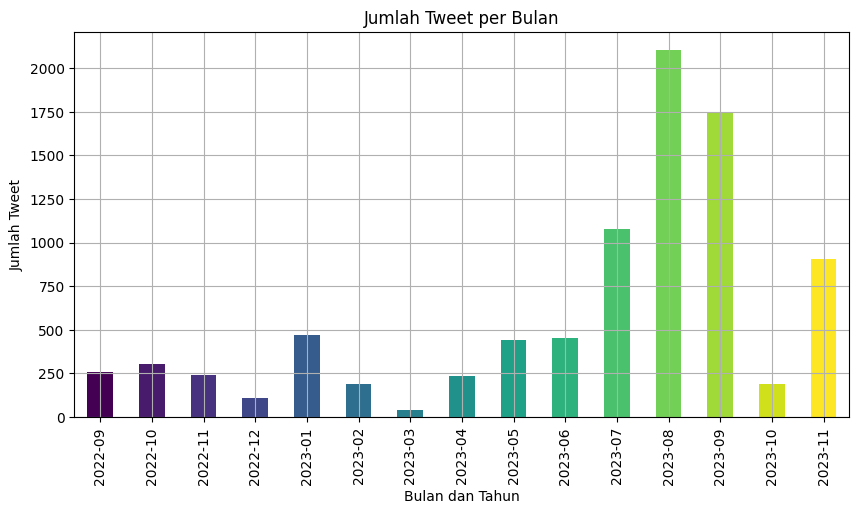

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Misalkan 'dataset' adalah DataFrame Anda
tweets = dataset.copy()

# Ubah format 'Date' menjadi datetime
tweets['Date'] = pd.to_datetime(tweets['Date'], format='%a %b %d %H:%M:%S +0000 %Y')

# Ekstrak bulan dan tahun dari 'Date' dan buat kolom baru 'YearMonth'
tweets['YearMonth'] = tweets['Date'].dt.to_period('M')

# Hitung jumlah tweet per bulan
monthly_tweets = tweets.groupby('YearMonth').size()

# Buat daftar warna untuk grafik batang
colors = plt.cm.viridis(np.linspace(0, 1, len(monthly_tweets)))

# Plot jumlah tweet per bulan dengan warna
monthly_tweets.plot(kind='bar', figsize=(10, 5), color=colors)

plt.xlabel("Bulan dan Tahun")
plt.ylabel("Jumlah Tweet")
plt.title("Jumlah Tweet per Bulan")
plt.grid(True)
plt.show()
dataset = dataset[['Tweet']]

In [9]:
alay_dict = pd.read_csv('https://raw.githubusercontent.com/rizkyyanuark/testpython/main/pemrosesan%20text/project%20pemro/new_kamusalay.csv', encoding='latin-1', header=None)
alay_dict = alay_dict.rename(columns={0: 'original',
                                      1: 'replacement'})

In [10]:
# Read the CSV file and specify the separator as ';'
alay_dict2 = pd.read_csv('https://raw.githubusercontent.com/rizkyyanuark/testpython/main/pemrosesan%20text/project%20pemro/kamus_singkatan_deluxe.csv', sep=';',encoding='latin-1')

# Set the column names
alay_dict2.columns = ['original', 'replacement']
alay_dict_map2 = dict(zip(alay_dict2['original'], alay_dict2['replacement']))
alay_dict2.head()

,original,replacement
0,adek,adik
1,adlh,adalah
2,aer,air
3,aiskrim,es krim
4,aj,saja


In [11]:
def lowercase(text):
    if isinstance(text, str):
        return text.lower()
    else:
        return text

dataset["preprocessed"] = dataset.Tweet.apply(lambda text: lowercase(text))
dataset

,Tweet,preprocessed
0,@lrtjabodebek Selain posting jadwal yg kacau i...,@lrtjabodebek selain posting jadwal yg kacau i...
1,Volume atau jumlah penumpang KRL Commuter Line...,volume atau jumlah penumpang krl commuter line...
2,@nadsfathinah sebenarnya bukan naik krl sih ka...,@nadsfathinah sebenarnya bukan naik krl sih ka...
3,Sekelas @cnbcindonesia @CNNIndonesia masih bel...,sekelas @cnbcindonesia @cnnindonesia masih bel...
4,Tarif LRT Jabodebek Dijamin Gak Naik Tahun Ini...,tarif lrt jabodebek dijamin gak naik tahun ini...
...,...,...
13391,Pantas saja Budiman gabung prabowo untuk cari ...,pantas saja budiman gabung prabowo untuk cari ...
13392,kek produk beta: (-) pendek banget gw harus nu...,kek produk beta: (-) pendek banget gw harus nu...
13393,Blue Moon #viralvideo Mahasiswa FISIP UI Inka ...,blue moon #viralvideo mahasiswa fisip ui inka ...
13394,SETELAN TUNIK WANITA HIJAB BAHAN BABYTERY http...,setelan tunik wanita hijab bahan babytery http...


In [12]:
def remove_link(text):
    text = re.sub('https?://t\.me/[^\s]+', ' ', text) # Menghapus setiap link Telegram
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', text) # Menghapus setiap url
    return text

dataset["preprocessed"] = dataset.preprocessed.astype(str).apply(lambda text: remove_link(text))
dataset

,Tweet,preprocessed
0,@lrtjabodebek Selain posting jadwal yg kacau i...,@lrtjabodebek selain posting jadwal yg kacau i...
1,Volume atau jumlah penumpang KRL Commuter Line...,volume atau jumlah penumpang krl commuter line...
2,@nadsfathinah sebenarnya bukan naik krl sih ka...,@nadsfathinah sebenarnya bukan naik krl sih ka...
3,Sekelas @cnbcindonesia @CNNIndonesia masih bel...,sekelas @cnbcindonesia @cnnindonesia masih bel...
4,Tarif LRT Jabodebek Dijamin Gak Naik Tahun Ini...,tarif lrt jabodebek dijamin gak naik tahun ini...
...,...,...
13391,Pantas saja Budiman gabung prabowo untuk cari ...,pantas saja budiman gabung prabowo untuk cari ...
13392,kek produk beta: (-) pendek banget gw harus nu...,kek produk beta: (-) pendek banget gw harus nu...
13393,Blue Moon #viralvideo Mahasiswa FISIP UI Inka ...,blue moon #viralvideo mahasiswa fisip ui inka ...
13394,SETELAN TUNIK WANITA HIJAB BAHAN BABYTERY http...,setelan tunik wanita hijab bahan babytery bl...


In [13]:
def transform_emoticons(text):
    text = text.replace("<3", "<love>")
    text = text.replace(":p", "<mengejek>")
    text = text.replace(":P", "<mengejek>")
    text = text.replace(":v", "<melucu>")
    text = text.replace(":V", "<melucu>")
    text = text.replace(":d", "<tertawa>")
    text = text.replace(":D", "<tertawa>")
    text = text.replace(":-D", "<tertawa>")
    text = text.replace(":o", "<terkejut>")
    text = text.replace(":O", "<terkejut>")
    text = text.replace("xD", "<tertawa terbahak bahak>")
    text = text.replace("XD", "<tertawa terbahak bahak>")
    text = text.replace(":*", "<mencium>")
    text = text.replace(":3", "<malu malu kucing>")
    text = text.replace("-__-", "<wajah datar>")
    text = text.replace("-_-", "<wajah datar>")
    text = text.replace(":|", "<wajah datar>")
    text = text.replace(":\\", "<terganggu>")
    text = text.replace(":/", "<terganggu>")
    text = text.replace(":))", "<senyum>")
    text = text.replace(":)", "<senyum>")
    text = text.replace(":-))", "<senyum>")
    text = text.replace(":-)", "<senyum>")
    text = text.replace("^^", "<senyum>")
    text = text.replace("^_^", "<senyum>")
    text = text.replace(";))", "<senyum berkedip>")
    text = text.replace(";)", "<senyum berkedip>")
    text = text.replace(":((", "<sedih>")
    text = text.replace(":(", "<sedih>")
    text = text.replace(":-((", "<sedih>")
    text = text.replace(":-(", "<sedih>")
    text = text.replace(":'((", "<menangis sedih>")
    text = text.replace(":'(", "<menangis sedih>")
    text = text.replace(":'))", "<menangis bahagia>")
    text = text.replace(":')", "<menangis bahagia>")
    text = text.replace(":'", "<menangis sedih>")
    text = text.replace(":’((", "<menangis sedih>")
    text = text.replace(":’(", "<menangis sedih>")
    text = text.replace(":’))", "<menangis bahagia>")
    text = text.replace(":’)", "<menangis bahagia>")
    text = text.replace(":’", "<menangis sedih>")
    text = text.replace(":\"((", "<menangis sedih>")
    text = text.replace(":\"(", "<menangis sedih>")
    text = text.replace(":\"))", "<menangis bahagia>")
    text = text.replace(":\")", "<menangis bahagia>")
    text = text.replace(":\"", "<menangis sedih>")
    text = text.replace(":\"D", "<menangis bahagia>")
    text = text.replace("TT", "<menangis sedih>")
    return text
dataset["preprocessed"] = dataset.preprocessed.apply(lambda text: transform_emoticons(text))
dataset

,Tweet,preprocessed
0,@lrtjabodebek Selain posting jadwal yg kacau i...,@lrtjabodebek selain posting jadwal yg kacau i...
1,Volume atau jumlah penumpang KRL Commuter Line...,volume atau jumlah penumpang krl commuter line...
2,@nadsfathinah sebenarnya bukan naik krl sih ka...,@nadsfathinah sebenarnya bukan naik krl sih ka...
3,Sekelas @cnbcindonesia @CNNIndonesia masih bel...,sekelas @cnbcindonesia @cnnindonesia masih bel...
4,Tarif LRT Jabodebek Dijamin Gak Naik Tahun Ini...,tarif lrt jabodebek dijamin gak naik tahun ini...
...,...,...
13391,Pantas saja Budiman gabung prabowo untuk cari ...,pantas saja budiman gabung prabowo untuk cari ...
13392,kek produk beta: (-) pendek banget gw harus nu...,kek produk beta: (-) pendek banget gw harus nu...
13393,Blue Moon #viralvideo Mahasiswa FISIP UI Inka ...,blue moon #viralvideo mahasiswa fisip ui inka ...
13394,SETELAN TUNIK WANITA HIJAB BAHAN BABYTERY http...,setelan tunik wanita hijab bahan babytery bl...


In [14]:
# Membuat kamus penggantian emoji ke teks
emoji_dict = {
    '🙏🏻': 'maaf',
    '🙏': 'maaf',
    '👍': 'baik',
    '👍🏽': 'baik',
    '🥺': 'mata sedih',
    '💕': 'cinta',
    '🤩': 'mata berbinar',
    '😭': 'tangis',
    '🥲': 'sedih',
    '😆': 'tawa teriak',
    '👏🏻': 'tepuk tangan',
    '🧐': 'pikir',
    '🙃': 'senyum',
    '😃': 'senang',
    '😊': 'senyum',
    '👀': 'mata lihat',
    '👮🏻': 'polisi',
    '😂': 'tawa lucu',
    '🤣': 'tawa lucu',
    '💃🏼': 'menari',
    '😫': 'lelah',
    '🤍': 'cinta putih',
    '😖': 'frustasi',
    '📥': 'kotak masuk',
    '📱': 'ponsel',
    '📍': 'lokasi',
    '😠': 'marah',
    '😤': 'kesal',
    '🤭': 'tawa malu',
    '🥰': 'sayang',
    '🤧': 'tangis sedih',
    '💙': 'cinta biru',
    '🎇': 'kembang api',
    '🥂': 'sulang',
    '👍🏼': 'baik',
    '😌': 'tenang',
    '🙏🏼': 'maaf',
    '🙌': 'hore',
    '😙': 'santai',
    '🌻': 'bunga matahari',
    '😳': 'malu',
    '💪': 'kuat',
    '🙂': 'senyum',
    '👋': 'hai',
    '😻': 'mata jatuh cinta',
    '🚗': 'mobil',
    '🗓': 'kalender',
    '👎': 'tidak suka',
    '🍻': 'minum',
    '👭': 'dua perempuan',
    '💻': 'laptop',
    '📢': 'pengumuman',
    '😱': 'kaget',
    '🙏🏿': 'maaf',
    '😄': 'tawa gembira',
    '😉': 'kedip satu mata',
    '🤗': 'wajah sayang',
    '🤬': 'marah kesal',
    '🏼': 'kulit cerah',
    '🙋': 'angkat tangan',
    '🩸': 'darah',
    '😎': 'keren',
    '🤲': 'doa',
    '😬': 'canggung',
    '😍': 'wajah cinta',
    '👌': 'oke',
    '🎉': 'pesta',
    '🤝': 'jabat tangan',
    '😔': 'kecewa',
    '😒': 'kesal',
    '👏': 'tepuk tangan',
    '🏷': 'label',
    '🥳': 'suka ria',
    '🏞': 'panorama',
    '🙌🏻': 'hore',
    '😕': 'bimbang',
    '😅': 'tawa canggung',
    '🤡': 'badut',
    '😇': 'tulus',
    '🔍': 'cari',
    '🤤': 'giur',
    '🧕🏻': 'perempuan kerudung',
    '👳🏼': 'laki sorban',
    '🍧': 'es krim',
    '🚀': 'roket',
    '🤫': 'rahasia',
    '🔥': 'api',
    '😐': 'wajah netral',
    '📣': 'pengumuman',
    '👌🏼': 'ok',
    '💔': 'patah hati',
    '👦': 'anak laki',
    '👩': 'wanita',
    '🙇🏻': 'sesal',
    '😁': 'tawa',
    '😋': 'lezat',
    '🧔': 'pria',
    '🧑': 'orang',
    '💥': 'ledak',
    '👩🏻': 'wanita',
    '🏫': 'gedung sekolah',
    '👨🏻': 'pria',
    '💗': 'cinta',
    '👇': 'tunjuk bawah',
    '👆': 'tunjuk atas',
    '🚨': 'darurat',
    '🔊': 'bunyi keras',
    '🌈': 'pelangi',
    '😪': 'lelah',
    '😚': 'bibir moncong',
    '📕': 'buku',
    '😝': 'ejek julur lidah',
    '😞': 'sedih murung',
    '📸': 'foto',
    '🤮': 'muntah',
    '🤏🏼': 'kecil gemas',
    '📎': 'klip',
    '🕗': 'jam',
    '🥴': 'muak',
    '📈': 'tingkat',
    '😥': 'cemas',
    '😘': 'cium',
    '📙': 'buku',
    '📞': 'telepon',
    '🪀': 'bola piring',
    '🧑🏼': 'orang',
    '🧠': 'otak',
    '🚮': 'buang',
    '🎊': 'pesta',
    '🧓': 'pria tua',
    '😏': 'remeh',
    '🤪': 'konyol',
    '🙆': 'angkat dua tangan',
    '🌙': 'bulan sabit',
    '💛': 'cinta kuning',
    '💡': 'lampu',
    '📑': 'dokumen',
    '🕌': 'masjid',
    '🙏🏽': 'maaf',
    '💓': 'cinta',
    '🤙🏻': 'asik',
    '😵': 'pusing',
    '🔫': 'tembak',
    '💪🏻': 'kuat',
    '👧': 'anak perempuan',
    '👦': 'anak laki',
    '💜': 'cinta ungu',
    '🛎': 'bel',
    '📲': 'ponsel',
    '💳': 'kartu kredit',
    '🖤': 'cinta hitam',
    '📅': 'kalender',
    '💰': 'uang',
    '💌': 'surat cinta',
    '🤲🏻': 'doa',
    '👍🏿': 'baik',
    '🐉': 'naga',
    '🙆🏻': 'angkat dua tangan',
    '🖐': 'angkat tangan',
    '📝': 'tulis',
    '📖': 'buku',
    '🏆': 'piala juara',
    '🎓': 'wisuda',
    '🤌🏼': 'diam',
    '👉🏻': 'tunjuk kanan',
    '👈🏻': 'tunjuk kiri',
    '🌿': 'daun',
    '😺': 'kucing ceria',
    '🙁': 'sedih',
    '💧': 'tetes air',
    '💸': 'uang',
    '👤': 'orang',
    '👉': 'tunjuk kanan',
    '👈': 'tunjuk kiri',
    '👋🏻': 'hai',
    '📋': 'dokumen',
    '😑': 'bosan',
    '🎰': 'mesin untung',
    '🌟': 'bintang',
    '📚': 'buku',
    '🤷🏻': 'tidak tau',
    '🤒': 'demam',
    '💖': 'cinta',
    '😾': 'kucing kesal',
    '🖱': 'mouse komputer',
    '🎙': 'mikrofon',
    '🤚': 'angkat tangan',
    '🎤': 'mikrofon',
    '🥪': 'roti lapis',
    '💎': 'berlian',
    '🏅': 'medali',
    '🎮': 'kontrol mainan',
    '👵': 'wanita tua',
    '🥇': 'medali juara satu',
    '📌': 'semat',
    '🗳': 'kotak suara',
    '🙈': 'monyet malu',
    '🌏': 'dunia',
    '🕑': 'jam',
    '🖇': 'klip',
    '🙌🏼': 'hore',
    '🔴': 'lingkaran merah',
    '👧🏻': 'anak perempuan',
    '👱🏻': 'pria',
    '👨': 'pria',
    '🦳': 'pria tua',
    '🕐': 'jam',
    '💁🏼': 'angkat tangan',
    '💁🏻': 'angkat tangan',
    '🌠': 'bintang',
    '😶': 'tanpa ekspresi',
    '👐🏻': 'tangan terbuka',
    '👁👄👁': 'cengang',
    '🙇': 'sesal',
    '🤙': 'keren',
    '😛': 'ejek julur lidah',
    '😣': 'cemas',
    '🤦': 'bodoh',
    '🥘': 'makanan',
    '🍹': 'minuman',
    '🤟': 'keren',
    '🗣': 'suara keras',
    '🏮': 'lampion merah',
    '🐃': 'banteng',
    '🧧': 'angpao',
    '💯': 'seratus',
    '🥈': 'medali juara dua',
    '🥉': 'medali juara tiga',
    '😓': 'murung lelah',
    '🤜': 'tangan kepal setuju',
    '🌝': 'wajah bulan',
    '🖐🏻': 'angkat tangan',
    '🎭': 'topeng',
    '😜': 'ejek julur lidah',
    '🙄': 'kesal heran',
    '😖': 'ragu',
    '🤘': 'keren',
    '📩': 'pesan masuk'
}

# Fungsi untuk mengubah emoji ke teks
def emoji_to_text(text):
    for emoji, replacement in emoji_dict.items():
        text = text.replace(emoji, replacement)
    return text

# Terapkan fungsi ke kolom preprocessed
dataset["preprocessed"] = dataset.preprocessed.apply(lambda text: emoji_to_text(text))
dataset



,Tweet,preprocessed
0,@lrtjabodebek Selain posting jadwal yg kacau i...,@lrtjabodebek selain posting jadwal yg kacau i...
1,Volume atau jumlah penumpang KRL Commuter Line...,volume atau jumlah penumpang krl commuter line...
2,@nadsfathinah sebenarnya bukan naik krl sih ka...,@nadsfathinah sebenarnya bukan naik krl sih ka...
3,Sekelas @cnbcindonesia @CNNIndonesia masih bel...,sekelas @cnbcindonesia @cnnindonesia masih bel...
4,Tarif LRT Jabodebek Dijamin Gak Naik Tahun Ini...,tarif lrt jabodebek dijamin gak naik tahun ini...
...,...,...
13391,Pantas saja Budiman gabung prabowo untuk cari ...,pantas saja budiman gabung prabowo untuk cari ...
13392,kek produk beta: (-) pendek banget gw harus nu...,kek produk beta: (-) pendek banget gw harus nu...
13393,Blue Moon #viralvideo Mahasiswa FISIP UI Inka ...,blue moon #viralvideo mahasiswa fisip ui inka ...
13394,SETELAN TUNIK WANITA HIJAB BAHAN BABYTERY http...,setelan tunik wanita hijab bahan babytery bl...


In [15]:
def remove_unnecessary_char(text):
    text = re.sub(r'@[\w]+', '', text) # menghapus username
    text = re.sub('  +', ' ', text) # Menghapus spasi ekstra
    text = re.sub('\n', ' ', text) # Menghapus setiap '\n'
    text = re.sub(r'\brt\b', ' ', text) # Menghapus setiap simbol retweet
    text = re.sub ('[^0-9a-zA-Z]+', ' ', text) # menghapus non aplhanumeric
    text = re.sub(r'\d+', '', text) # menghapus semua angka
    return text

dataset["preprocessed"] = dataset.preprocessed.apply(lambda text: remove_unnecessary_char(text))
dataset

,Tweet,preprocessed
0,@lrtjabodebek Selain posting jadwal yg kacau i...,selain posting jadwal yg kacau ini tolong upd...
1,Volume atau jumlah penumpang KRL Commuter Line...,volume atau jumlah penumpang krl commuter line...
2,@nadsfathinah sebenarnya bukan naik krl sih ka...,sebenarnya bukan naik krl sih kalau habis nai...
3,Sekelas @cnbcindonesia @CNNIndonesia masih bel...,sekelas masih belom bisa bedain gambar mana lr...
4,Tarif LRT Jabodebek Dijamin Gak Naik Tahun Ini...,tarif lrt jabodebek dijamin gak naik tahun ini...
...,...,...
13391,Pantas saja Budiman gabung prabowo untuk cari ...,pantas saja budiman gabung prabowo untuk cari ...
13392,kek produk beta: (-) pendek banget gw harus nu...,kek produk beta pendek banget gw harus nunduk ...
13393,Blue Moon #viralvideo Mahasiswa FISIP UI Inka ...,blue moon viralvideo mahasiswa fisip ui inka r...
13394,SETELAN TUNIK WANITA HIJAB BAHAN BABYTERY http...,setelan tunik wanita hijab bahan babytery blue...


In [16]:
def remove_stopword(text):
    stop_words = set(stopwords.words('indonesian'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return ' '.join(filtered_text)

dataset["preprocessed"] = dataset.preprocessed.apply(lambda text: remove_stopword(text))
dataset


,Tweet,preprocessed
0,@lrtjabodebek Selain posting jadwal yg kacau i...,posting jadwal yg kacau tolong update ttg trai...
1,Volume atau jumlah penumpang KRL Commuter Line...,volume penumpang krl commuter line meningkat k...
2,@nadsfathinah sebenarnya bukan naik krl sih ka...,krl sih habis kereta cepat whoosh naiknya lrt ...
3,Sekelas @cnbcindonesia @CNNIndonesia masih bel...,sekelas belom bedain gambar lrt jakarta lrt ja...
4,Tarif LRT Jabodebek Dijamin Gak Naik Tahun Ini...,tarif lrt jabodebek dijamin gak segini
...,...,...
13391,Pantas saja Budiman gabung prabowo untuk cari ...,budiman gabung prabowo cari cuan lunasin hutan...
13392,kek produk beta: (-) pendek banget gw harus nu...,kek produk beta pendek banget gw nunduk rem ga...
13393,Blue Moon #viralvideo Mahasiswa FISIP UI Inka ...,blue moon viralvideo mahasiswa fisip ui inka r...
13394,SETELAN TUNIK WANITA HIJAB BAHAN BABYTERY http...,setelan tunik wanita hijab bahan babytery blue...


In [17]:
alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))
def normalize_alay(text):
    return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])
dataset["preprocessed"] = dataset.preprocessed.apply(lambda text: normalize_alay(text))
dataset

,Tweet,preprocessed
0,@lrtjabodebek Selain posting jadwal yg kacau i...,posting jadwal yang kacau tolong pembaruan ten...
1,Volume atau jumlah penumpang KRL Commuter Line...,volume penumpang kereta listrik commuter line ...
2,@nadsfathinah sebenarnya bukan naik krl sih ka...,kereta listrik sih habis kereta cepat whoosh n...
3,Sekelas @cnbcindonesia @CNNIndonesia masih bel...,sekelas belum bedakan gambar light rail transi...
4,Tarif LRT Jabodebek Dijamin Gak Naik Tahun Ini...,tarif light rail transit jabodebek dijamin tid...
...,...,...
13391,Pantas saja Budiman gabung prabowo untuk cari ...,budiman gabung prabowo cari cuan lunasin hutan...
13392,kek produk beta: (-) pendek banget gw harus nu...,kayak produk beta pendek banget gue menunduk r...
13393,Blue Moon #viralvideo Mahasiswa FISIP UI Inka ...,blue bulan viralvideo mahasiswa fakultas ilmu ...
13394,SETELAN TUNIK WANITA HIJAB BAHAN BABYTERY http...,setelan tunik wanita hijab bahan babytery blue...


In [18]:
def normalize_alay2(text):
    return ' '.join([alay_dict_map2[word] if word in alay_dict_map2 else word for word in text.split(' ')])
dataset["preprocessed"] = dataset.preprocessed.apply(lambda text: normalize_alay2(text))
dataset

,Tweet,preprocessed
0,@lrtjabodebek Selain posting jadwal yg kacau i...,posting jadwal yang kacau tolong pembaruan ten...
1,Volume atau jumlah penumpang KRL Commuter Line...,volume penumpang kereta listrik commuter line ...
2,@nadsfathinah sebenarnya bukan naik krl sih ka...,kereta listrik sih habis kereta cepat whoosh n...
3,Sekelas @cnbcindonesia @CNNIndonesia masih bel...,sekelas belum bedakan gambar light rail transi...
4,Tarif LRT Jabodebek Dijamin Gak Naik Tahun Ini...,tarif light rail transit jabodebek dijamin tid...
...,...,...
13391,Pantas saja Budiman gabung prabowo untuk cari ...,budiman gabung prabowo cari cuan lunasin hutan...
13392,kek produk beta: (-) pendek banget gw harus nu...,mirip produk beta pendek sekali saya menundu...
13393,Blue Moon #viralvideo Mahasiswa FISIP UI Inka ...,blue bulan viralvideo mahasiswa fakultas ilmu ...
13394,SETELAN TUNIK WANITA HIJAB BAHAN BABYTERY http...,setelan tunik wanita hijab bahan babytery blue...


In [19]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()
def stemming(text):
    return stemmer.stem(text)
dataset["preprocessed"] = dataset.preprocessed.apply(lambda text: stemming(text))
dataset

,Tweet,preprocessed
0,@lrtjabodebek Selain posting jadwal yg kacau i...,posting jadwal yang kacau tolong baru tentang ...
1,Volume atau jumlah penumpang KRL Commuter Line...,volume tumpang kereta listrik commuter line ti...
2,@nadsfathinah sebenarnya bukan naik krl sih ka...,kereta listrik sih habis kereta cepat whoosh n...
3,Sekelas @cnbcindonesia @CNNIndonesia masih bel...,kelas belum beda gambar light rail transit jak...
4,Tarif LRT Jabodebek Dijamin Gak Naik Tahun Ini...,tarif light rail transit jabodebek jamin tidak...
...,...,...
13391,Pantas saja Budiman gabung prabowo untuk cari ...,budiman gabung prabowo cari cuan lunasin hutan...
13392,kek produk beta: (-) pendek banget gw harus nu...,mirip produk beta pendek sekali saya tunduk re...
13393,Blue Moon #viralvideo Mahasiswa FISIP UI Inka ...,blue bulan viralvideo mahasiswa fakultas ilmu ...
13394,SETELAN TUNIK WANITA HIJAB BAHAN BABYTERY http...,setel tunik wanita hijab bahan babytery blue b...


In [20]:
def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text
dataset['tokenizing'] = dataset['preprocessed'].apply(tokenizingText)
dataset

,Tweet,preprocessed,tokenizing
0,@lrtjabodebek Selain posting jadwal yg kacau i...,posting jadwal yang kacau tolong baru tentang ...,"[posting, jadwal, yang, kacau, tolong, baru, t..."
1,Volume atau jumlah penumpang KRL Commuter Line...,volume tumpang kereta listrik commuter line ti...,"[volume, tumpang, kereta, listrik, commuter, l..."
2,@nadsfathinah sebenarnya bukan naik krl sih ka...,kereta listrik sih habis kereta cepat whoosh n...,"[kereta, listrik, sih, habis, kereta, cepat, w..."
3,Sekelas @cnbcindonesia @CNNIndonesia masih bel...,kelas belum beda gambar light rail transit jak...,"[kelas, belum, beda, gambar, light, rail, tran..."
4,Tarif LRT Jabodebek Dijamin Gak Naik Tahun Ini...,tarif light rail transit jabodebek jamin tidak...,"[tarif, light, rail, transit, jabodebek, jamin..."
...,...,...,...
13391,Pantas saja Budiman gabung prabowo untuk cari ...,budiman gabung prabowo cari cuan lunasin hutan...,"[budiman, gabung, prabowo, cari, cuan, lunasin..."
13392,kek produk beta: (-) pendek banget gw harus nu...,mirip produk beta pendek sekali saya tunduk re...,"[mirip, produk, beta, pendek, sekali, saya, tu..."
13393,Blue Moon #viralvideo Mahasiswa FISIP UI Inka ...,blue bulan viralvideo mahasiswa fakultas ilmu ...,"[blue, bulan, viralvideo, mahasiswa, fakultas,..."
13394,SETELAN TUNIK WANITA HIJAB BAHAN BABYTERY http...,setel tunik wanita hijab bahan babytery blue b...,"[setel, tunik, wanita, hijab, bahan, babytery,..."


In [21]:
import pandas as pd

# Loads lexicon positive and negative data
url_positive = 'https://raw.githubusercontent.com/rizkyyanuark/testpython/main/pemrosesan%20text/project%20pemro/lexicon_positive.csv'
lexicon_positive = pd.read_csv(url_positive, index_col=0, squeeze=True).to_dict()

url_negative = 'https://raw.githubusercontent.com/rizkyyanuark/testpython/main/pemrosesan%20text/project%20pemro/lexicon_negative.csv'
lexicon_negative = pd.read_csv(url_negative, index_col=0, squeeze=True).to_dict()

# Function to determine sentiment polarity of tweets
def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    for word in text:
        score += lexicon_positive.get(word, 0)
        score += lexicon_negative.get(word, 0)
    if score > 0:
        return score, 'positive'
    elif score < 0:
        return score, 'negative'
    else:
        return score, 'neutral'

results = dataset['tokenizing'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
dataset['polarity_score'] = results[0]
dataset['polarity'] = results[1]
print(dataset['polarity'].value_counts())


<ipython-input-21-59d58e03c2a1>:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  lexicon_positive = pd.read_csv(url_positive, index_col=0, squeeze=True).to_dict()
<ipython-input-21-59d58e03c2a1>:8: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  lexicon_negative = pd.read_csv(url_negative, index_col=0, squeeze=True).to_dict()


negative    6262
positive    1793
neutral      711
Name: polarity, dtype: int64


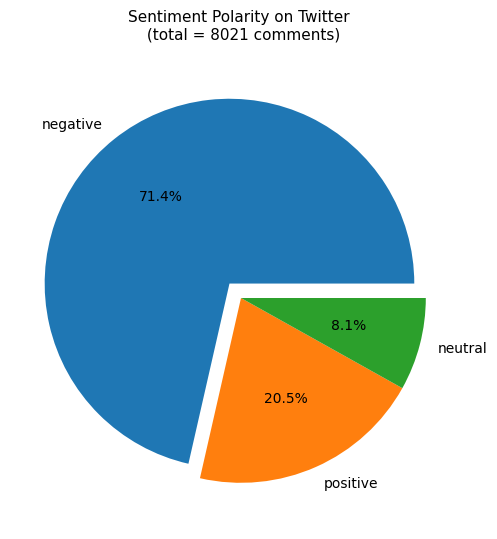

In [22]:
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in dataset['polarity'].value_counts()]
labels = list(dataset['polarity'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 10})
ax.set_title('Sentiment Polarity on Twitter \n (total = 8021 comments)', fontsize = 11, pad = 20)
plt.show()

In [23]:
pd.set_option('display.max_colwidth', 3000)
positive_comments = dataset[dataset['polarity'] == 'positive']
positive_comments = positive_comments[['preprocessed', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=False).reset_index(drop = True)
positive_comments.index += 1
positive_comments[122:130]

,preprocessed,polarity_score,polarity
123,logo representasi layan light rail transit jabodebek moda transportasi massal modern light rail transit jabodebek operasi masinis otomatis awas pusat kendali,11,positive
124,foto pt kamu luncur logo layan light rail transit jabodebek tuju kenal masyarakat target operasi juli foto dok pt kamu,11,positive
125,logo representasi layan light rail transit jabodebek moda transportasi massal modern light rail transit jabodebek operasi masinis otomatis awas pusat kendali,11,positive
126,alhamdulillah baik rabu blue bulan malam maudy ayunda inka selingkuh aparatur sipil negara amrabat to manchester united krunic well come back ciput pinpri gacor fakultas ilmu sosial dan ilmu politik oi mahasiswa evnne is coming palmer light rail transit jabodebek genoa lorrient van deh beek pakeajadulu viralvideo timasu mufc,11,positive
127,kamu karyawan jelang operasi light rail transit jabodebek yuk detikers apply,11,positive
128,always baju merah the hero one kes kereta itu baju merah selamat now at light rail transit baju merah hihi,11,positive
129,operator light rail transit jakarta layan rute stasiun gangsa velodrome beda light rail transit jabodebek kait langsung konfirmasi akun sosial media terima kasih senyum,11,positive
130,halo kak selamat malam mohon maaf kak light rail transit jakarta operator beda light rail transit jabodebek informasi langsung konfirmasi ya kak terima kasih senyum,11,positive


In [24]:
pd.set_option('display.max_colwidth', 3000)
positive_comments = dataset[dataset['polarity'] == 'negative']
positive_comments = positive_comments[['preprocessed', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=False).reset_index(drop = True)
positive_comments.index += 1
positive_comments[200:210]

,preprocessed,polarity_score,polarity
201,hi teman raina kereta light rail transit jabodebek pahlawan lah tahu yuk simak lrtjabodebek smarttravellivebetter,-1,negative
202,taman mini indonesia indah light rail transit dukuh turun light rail transit ganti kereta mrt blok sama,-1,negative
203,light rail transit mrt kereta api tawa lucu,-1,negative
204,mon maaf bang presiden bilang cari kesalahanmaaf,-1,negative
205,cuma saja digo friends sudah light rail transit jabodebek resmi presiden joko widodo tahu rute rute cek video ayo digoid light rail transit lrtjabodebek,-1,negative
206,light rail transit kereta cepat foto,-1,negative
207,halo kak selamat pagi mohon maaf kak informasi light rail transit jabodebek beda operator usaha,-1,negative
208,presiden light rail transit jabodebek buru buru operasional evaluasi jokowi lrtjabodebek ericthohir,-1,negative
209,l light rail transit panjang light light light rail transit alias kereta transit ringan,-1,negative
210,aduh jadwal operasi light rail transit jabodebek mundur tahun light rail transit lrtjabodebek jadwaloperasilrt operasilrt infrastrukturjabodetabek,-1,negative


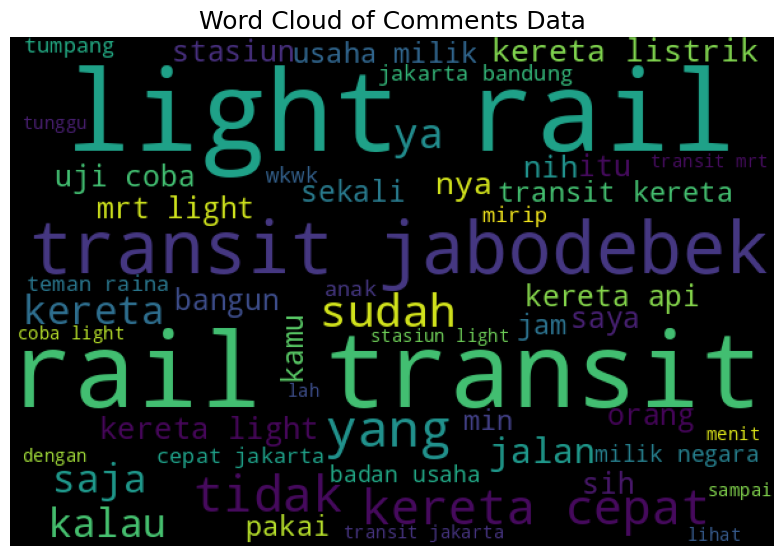

In [25]:
# Visualize word cloud
list_words=''
for comment in dataset['tokenizing']:
    for word in comment:
        list_words += ' '+(word)

wordcloud = WordCloud(width = 600, height = 400, background_color = 'black', min_font_size = 10).generate(list_words)
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Word Cloud of Comments Data', fontsize = 18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

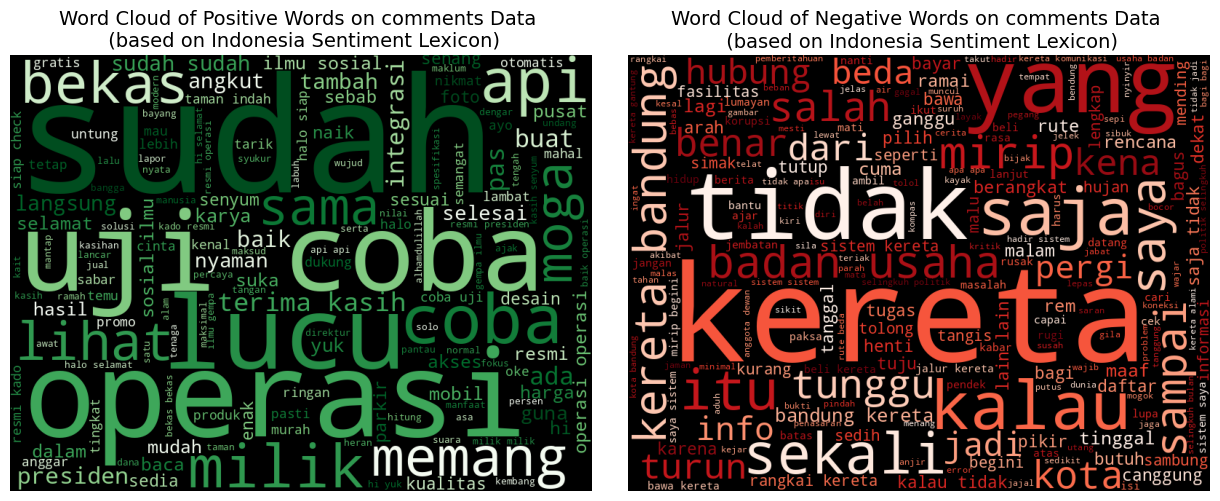

In [26]:
# Function to group all positive/negative words
def words_with_sentiment(text):
    positive_words=[]
    negative_words=[]
    for word in text:
        score_pos = 0
        score_neg = 0
        if (word in lexicon_positive):
            score_pos = lexicon_positive[word]
        if (word in lexicon_negative):
            score_neg = lexicon_negative[word]

        if (score_pos + score_neg > 0):
            positive_words.append(word)
        elif (score_pos + score_neg < 0):
            negative_words.append(word)

    return positive_words, negative_words
# Visualize positive and negative word cloud
sentiment_words = dataset['tokenizing'].apply(words_with_sentiment)
sentiment_words = list(zip(*sentiment_words))
positive_words = sentiment_words[0]
negative_words = sentiment_words[1]

fig, ax = plt.subplots(1, 2,figsize = (12, 10))
list_words_postive=''
for row_word in positive_words:
    for word in row_word:
        list_words_postive += ' '+(word)
wordcloud_positive = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Greens'
                               , min_font_size = 10).generate(list_words_postive)
ax[0].set_title('Word Cloud of Positive Words on comments Data \n (based on Indonesia Sentiment Lexicon)', fontsize = 14)
ax[0].grid(False)
ax[0].imshow((wordcloud_positive))
fig.tight_layout(pad=0)
ax[0].axis('off')

list_words_negative=''
for row_word in negative_words:
    for word in row_word:
        list_words_negative += ' '+(word)
wordcloud_negative = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Reds'
                               , min_font_size = 10).generate(list_words_negative)
ax[1].set_title('Word Cloud of Negative Words on comments Data \n (based on Indonesia Sentiment Lexicon)', fontsize = 14)
ax[1].grid(False)
ax[1].imshow((wordcloud_negative))
fig.tight_layout(pad=0)
ax[1].axis('off')

plt.show()

In [27]:
fasttext = gensim.models.fasttext.load_facebook_model("/content/Fastext_model_tweet.bin")
print("Ada %s vektor kata yang ditemukan dalam model FastText" % len(fasttext.wv))

ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xe2'; replacing invalid characters, using '\\xe2'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xe5'; replacing invalid characters, using '\\xe5'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xe3'; replacing invalid characters, using '\\xe3'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xeb'; replacing invalid characters, using '\\xeb'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'x9c\xe2'; replacing invalid characters, using 'x9c\\xe2'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xf4'; replacing invalid characters, using '\\xf4'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'x98\xe2'; replacing invalid characters, using 'x98\\xe2'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'x99\xe2'; replacing invalid cha

Ada 69465 vektor kata yang ditemukan dalam model FastText


In [28]:
vectors = []
for text in dataset.preprocessed.values:
    word_embedding = []
    for word in text.split(" "):
        try:
            word_vec = fasttext.wv[word]
            word_embedding.append(word_vec)
        except:
            pass
    word_embedding = np.array(word_embedding)
    embeddings = np.mean(word_embedding, axis=0)
    vectors.append(embeddings)
vectors = np.array(vectors)
print("Dimensi dari fitur yang digunakan yaitu", (vectors.shape))

Dimensi dari fitur yang digunakan yaitu (8766, 100)


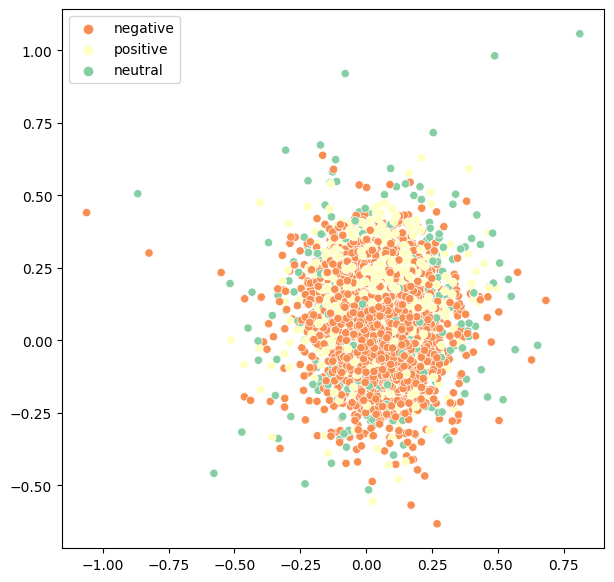

In [29]:
X = vectors
Y = np.array(dataset.polarity)
figure, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, ax=ax, palette="Spectral")
plt.show()

In [30]:
linear_svm = SVC(kernel="linear")

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)
normalizer = Normalizer()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)
print("Jumlah dari train data adalah", len(X_train))
print("\nSedangkan jumlah dari test data yaitu", len(X_test))

Jumlah dari train data adalah 7889

Sedangkan jumlah dari test data yaitu 877


In [32]:
linear_svm.fit(X_train, Y_train)
filename = "/content/SVMlinear_model.sav"
joblib.dump(linear_svm, filename)

['/content/SVMlinear_model.sav']

In [33]:
start = time()
loaded_model = joblib.load("/content/SVMlinear_model.sav")
Y_pred = loaded_model.predict(X_test)
acc_score = accuracy_score(Y_test, Y_pred)
end = time()
elapsed = end - start

print("Akurasi yang dihasilkan  pada ekstraksi fitur fasttext adalah %.2f%%\n" % (acc_score*100))
print("Dan berikut merupakan hasil evaluasi secara keseluruhan:\n\n", classification_report(Y_test, Y_pred))
print("Lama waktu yang dibutuhkan untuk memproses yaitu %.2f detik." % (elapsed))

Akurasi yang dihasilkan  pada ekstraksi fitur fasttext adalah 79.48%

Dan berikut merupakan hasil evaluasi secara keseluruhan:

               precision    recall  f1-score   support

    negative       0.80      0.97      0.88       628
     neutral       0.67      0.14      0.22        74
    positive       0.76      0.43      0.55       175

    accuracy                           0.79       877
   macro avg       0.74      0.51      0.55       877
weighted avg       0.78      0.79      0.76       877

Lama waktu yang dibutuhkan untuk memproses yaitu 0.18 detik.


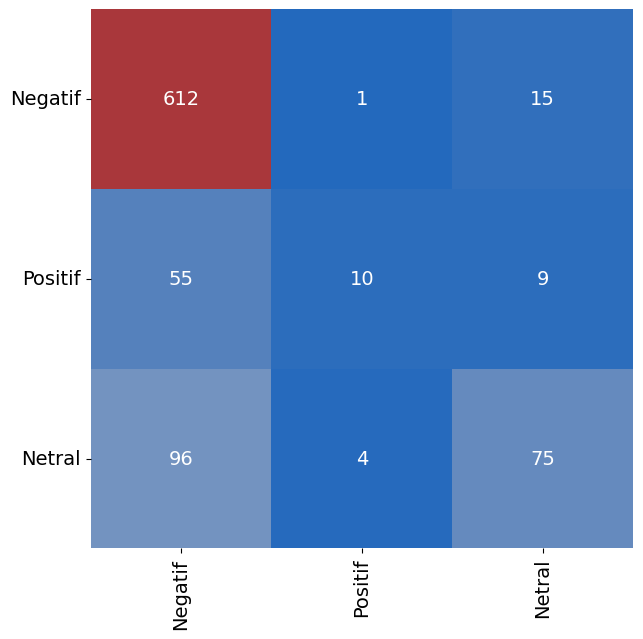

In [34]:
figure, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt="g", annot_kws={"size": 14}, cmap="vlag", cbar=False)
ax.set_xticklabels(["Negatif", "Positif", "Netral"], fontsize="14", rotation=90)
ax.set_yticklabels(["Negatif", "Positif", "Netral"], fontsize="14", rotation=0)
plt.show()

In [35]:
#dataset.to_csv("/content/drive/MyDrive/pemrosesan text/clean dataset.csv", index=False)